# Covid-19 data analysis for the Netherland
## uses covid data to learn datascience in pyhton woth Jupyterlab

*Goals*
1. learning datawcience
2. learning python
3. learning Jupyterlab
4. maybe get some insight in covid

In [1]:
## install modules for Google Colab
# uncomment line below and run cell
#!pip install tabula-py cbsodata

In [2]:
#from IPython.display import Markdown as md
import numpy as np
import pandas as pd
import tabula
from datetime import datetime
import json

import cbsodata as cbs

## Revert to charts in pandas, for simplicity. 
#To DO: add Bokeh - https://docs.bokeh.org/
#from bokeh.io import output_notebook
#from bokeh.plotting import figure, show
#from bokeh.palettes import viridis
#import pandas_bokeh
#output_notebook()

## Collecting data

### CBS
https://opendata.cbs.nl/statline/portal.html

In [5]:
pop_ym = pd.DataFrame(cbs.get_data('37230ned'))
#print(population.head())
print('Bevolkingsontwikkeling; maand en jaar 2002-now (Population statistics, month and year): IMPORTED')

pop_ym = pop_ym.drop(columns=['ID', 'BevolkingAanHetBeginVanDePeriode_1','TotaleVestiging_4',
       'VestigingVanuitEenAndereGemeente_5', 'Immigratie_6',
       'TotaalVertrekInclAdmCorrecties_7', 'VertrekNaarAndereGemeente_8',
       'EmigratieInclusiefAdmCorrecties_9', 'OverigeCorrecties_10',
       'Bevolkingsgroei_11', 'BevolkingsgroeiRelatief_12',
       'BevolkingsgroeiSinds1Januari_13',
       'BevolkingsgroeiSinds1JanuariRela_14'])
pop_ym = pop_ym.rename(columns={"LevendGeborenKinderen_2": "Born", "Overledenen_3": "Deceased", "BevolkingAanHetEindeVanDePeriode_15": "Population"})
print('Unnecessary columns droped')

Bevolkingsontwikkeling; maand en jaar 2002-now (Population statistics, month and year): IMPORTED
Unnecessary columns droped


In [6]:
# extract year & month from 'Perioden'
pop_ym['year'] = pd.to_datetime(pop_ym['Perioden'].str.slice(stop=4),format='%Y').dt.year
pop_ym['month'] = pop_ym['Perioden'].str.slice(start=5)
pop_ym = pop_ym.drop(columns='Perioden')

In [7]:
# make seperate df for year & month
pop_y = pop_ym.loc[pop_ym['month'] == '']
pop_y = pop_y.drop(columns='month')
pop_m = pop_ym.loc[pop_ym['month'] != '']

In [8]:
pop_m['monthNr'] = pop_m['month'].copy()
pop_m['monthNr'] = pop_m['monthNr'].replace({
    'januari': '01',
    'februari': '02',
    'maart': '03',
    'april': '04',
    'mei': '05',
    'juni': '06',
    'juli': '07',
    'augustus': '08',
    'september': '09',
    'oktober': '10',
    'november': '11',
    'december': '12'})
pop_m['monthNr'] = pd.to_datetime(pop_m['monthNr'],format='%m').dt.month

/home/pi/.venv/jns/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/pi/.venv/jns/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pi/.venv/jns/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [9]:
print('Nederland')
pop_y_nl = pop_y[pop_y['RegioS'] == 'Nederland']
pop_y = pop_y[pop_y['RegioS'] != 'Nederland']
print(pop_y_nl)
pop_m_nl = pop_m[pop_m['RegioS'] == 'Nederland']
pop_m = pop_m[pop_m['RegioS'] != 'Nederland']
print(pop_m_nl)

Nederland
        RegioS      Born  Deceased  Population  year
12   Nederland  202083.0  142355.0  16192572.0  2002
25   Nederland  200297.0  141936.0  16258032.0  2003
38   Nederland  194007.0  136553.0  16305526.0  2004
51   Nederland  187910.0  136402.0  16334210.0  2005
64   Nederland  185057.0  135372.0  16357992.0  2006
77   Nederland  181336.0  133022.0  16405399.0  2007
90   Nederland  184634.0  135136.0  16485787.0  2008
103  Nederland  184915.0  134235.0  16574989.0  2009
116  Nederland  184397.0  136058.0  16655799.0  2010
129  Nederland  180060.0  135741.0  16730348.0  2011
142  Nederland  175959.0  140813.0  16779575.0  2012
155  Nederland  171341.0  141245.0  16829289.0  2013
168  Nederland  175181.0  139223.0  16900726.0  2014
181  Nederland  170510.0  147134.0  16979120.0  2015
194  Nederland  172520.0  148997.0  17081507.0  2016
207  Nederland  169836.0  150214.0  17181084.0  2017
220  Nederland  168525.0  153363.0  17282163.0  2018
233  Nederland  169680.0  151885.0  

In [10]:
print('Landsdeel')
print(pop_y)
pop_y_ld = pop_y[pop_y['RegioS'].str.slice(start=-4) == '(LD)']
pop_y = pop_y[pop_y['RegioS'].str.slice(start=-4) != '(LD)']
print(pop_y_ld)
pop_m_ld = pop_m[pop_m['RegioS'].str.slice(start=-4) == '(LD)']
pop_m = pop_m[pop_m['RegioS'].str.slice(start=-4) != '(LD)']
print(pop_m_ld)

Landsdeel
                      RegioS     Born  Deceased  Population  year
254     Noord-Nederland (LD)  20273.0   16087.0   1694038.0  2002
267     Noord-Nederland (LD)  19886.0   15840.0   1698865.0  2003
280     Noord-Nederland (LD)  19012.0   15356.0   1701418.0  2004
293     Noord-Nederland (LD)  18419.0   15171.0   1700753.0  2005
306     Noord-Nederland (LD)  18084.0   15527.0   1702020.0  2006
...                      ...      ...       ...         ...   ...
147075                Zwolle   1491.0     967.0    124896.0  2015
147088                Zwolle   1541.0     913.0    125548.0  2016
147101                Zwolle   1443.0     977.0    126116.0  2017
147114                Zwolle   1458.0     988.0    127497.0  2018
147127                Zwolle   1460.0     953.0    128840.0  2019

[10926 rows x 5 columns]
                    RegioS     Born  Deceased  Population  year
254   Noord-Nederland (LD)  20273.0   16087.0   1694038.0  2002
267   Noord-Nederland (LD)  19886.0   15840.

In [11]:
print('Provincie')
print(pop_y)
pop_y_pv = pop_y[pop_y['RegioS'].str.slice(start=-4) == '(PV)']
pop_y = pop_y[pop_y['RegioS'].str.slice(start=-4) != '(PV)']
print(pop_y_pv)
pop_m_pv = pop_m[pop_m['RegioS'].str.slice(start=-4) == '(PV)']
pop_m = pop_m[pop_m['RegioS'].str.slice(start=-4) != '(PV)']
print(pop_m_pv)

Provincie
                RegioS    Born  Deceased  Population  year
1222    Groningen (PV)  6523.0    5550.0    572997.0  2002
1235    Groningen (PV)  6438.0    5552.0    574384.0  2003
1248    Groningen (PV)  6141.0    5311.0    575072.0  2004
1261    Groningen (PV)  5943.0    5216.0    574042.0  2005
1274    Groningen (PV)  5838.0    5258.0    573614.0  2006
...                ...     ...       ...         ...   ...
147075          Zwolle  1491.0     967.0    124896.0  2015
147088          Zwolle  1541.0     913.0    125548.0  2016
147101          Zwolle  1443.0     977.0    126116.0  2017
147114          Zwolle  1458.0     988.0    127497.0  2018
147127          Zwolle  1460.0     953.0    128840.0  2019

[10854 rows x 5 columns]
              RegioS    Born  Deceased  Population  year
1222  Groningen (PV)  6523.0    5550.0    572997.0  2002
1235  Groningen (PV)  6438.0    5552.0    574384.0  2003
1248  Groningen (PV)  6141.0    5311.0    575072.0  2004
1261  Groningen (PV)  5943.0

In [12]:
print('COROP-gebied')
print(pop_y)
pop_y_cr = pop_y[pop_y['RegioS'].str.slice(start=-4) == '(CR)']
pop_y = pop_y[pop_y['RegioS'].str.slice(start=-4) != '(CR)']
print(pop_y_cr)
pop_m_cr = pop_m[pop_m['RegioS'].str.slice(start=-4) == '(CR)']
pop_m = pop_m[pop_m['RegioS'].str.slice(start=-4) != '(CR)']
print(pop_m_cr)

COROP-gebied
                     RegioS    Born  Deceased  Population  year
4126    Oost-Groningen (CR)  1706.0    1741.0    154634.0  2002
4139    Oost-Groningen (CR)  1592.0    1795.0    154611.0  2003
4152    Oost-Groningen (CR)  1509.0    1633.0    153912.0  2004
4165    Oost-Groningen (CR)  1477.0    1662.0    154302.0  2005
4178    Oost-Groningen (CR)  1443.0    1659.0    153809.0  2006
...                     ...     ...       ...         ...   ...
147075               Zwolle  1491.0     967.0    124896.0  2015
147088               Zwolle  1541.0     913.0    125548.0  2016
147101               Zwolle  1443.0     977.0    126116.0  2017
147114               Zwolle  1458.0     988.0    127497.0  2018
147127               Zwolle  1460.0     953.0    128840.0  2019

[10638 rows x 5 columns]
                    RegioS    Born  Deceased  Population  year
4126   Oost-Groningen (CR)  1706.0    1741.0    154634.0  2002
4139   Oost-Groningen (CR)  1592.0    1795.0    154611.0  2003
4152

In [13]:
print('Gemeenten')
pop_y_gm = pop_y
del(pop_y)
print(pop_y_gm)

pop_m_gm = pop_m
del(pop_m)
print(pop_m_gm)

Gemeenten
             RegioS    Born  Deceased  Population  year
13806   Aa en Hunze   289.0     251.0     25305.0  2002
13819   Aa en Hunze   279.0     241.0     25218.0  2003
13832   Aa en Hunze   233.0     221.0     25329.0  2004
13845   Aa en Hunze   230.0     231.0     25507.0  2005
13858   Aa en Hunze   216.0     212.0     25563.0  2006
...             ...     ...       ...         ...   ...
147075       Zwolle  1491.0     967.0    124896.0  2015
147088       Zwolle  1541.0     913.0    125548.0  2016
147101       Zwolle  1443.0     977.0    126116.0  2017
147114       Zwolle  1458.0     988.0    127497.0  2018
147127       Zwolle  1460.0     953.0    128840.0  2019

[9918 rows x 5 columns]
             RegioS   Born  Deceased  Population  year     month  monthNr
13794   Aa en Hunze   25.0      21.0     25578.0  2002   januari        1
13795   Aa en Hunze   27.0      16.0     25606.0  2002  februari        2
13796   Aa en Hunze   36.0      23.0     25594.0  2002     maart       

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

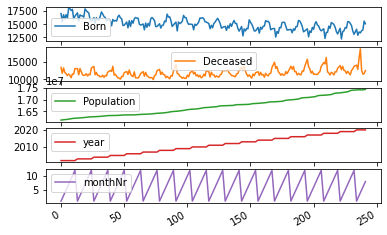

In [33]:
pop_m_nl.plot(subplots=True)

<AxesSubplot:xlabel='year'>

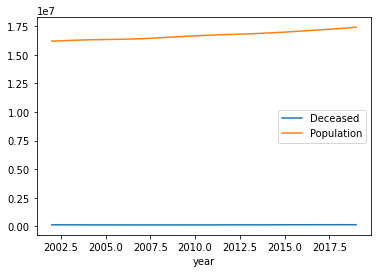

In [26]:
pop_y_nl.plot(x='year',y=['Deceased','Population'])

In [ ]:
pop_reg = pd.DataFrame(cbs.get_data('70072ned'))
print(population.head())
print('Regionale kerncijfers Nederland 1995-now (Population statistics, regional): IMPORTED')

### and then reproducting the coronadashboard
The data I use is the sources used formhet Coronadashbord of the Dutch government. https://coronadashboard.rijksoverheid.nl/
  
This contains:
*medical indicators*

In [ ]:
print("- number of positive tests")
# number of positive tests (https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427)
pt = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.json')
#print(pt.head())

In [ ]:
# correct dates
pt['Date_of_report'] = pd.to_datetime(pt['Date_of_report']).dt.date
pt['Date_of_publication'] = pd.to_datetime(pt['Date_of_publication']).dt.date
#print(pt.head())

In [ ]:
# Gemiddeld aantal positief geteste mensen per 100.000 inwoners
## Dit getal laat zien van hoeveel mensen gisteren per 100.000 inwoners gemeld is dat ze positief getest zijn en COVID-19 hebben.
pt_agg = pt.groupby('Date_of_publication').sum()
pt_agg['p100k'] = pt_agg['Total_reported'] / population_total * 100000
#pt_agg
#pt_agg['mov_avg_p100k'] = np.average(pt_agg['']])
#np.mean(pt[len(pt.columns)-1].Total_reported)

In [ ]:
# Aantal positief geteste mensen
## Dit getal laat zien van hoeveel mensen gisteren gemeld is dat ze positief getest zijn en COVID-19 hebben.

In [ ]:
#Verdeling positief geteste mensen in Nederland
## per gemeente

## per veiligheidsregio



In [ ]:
# TESTING BOKEH WITH OTHER DATA
# pt_agg = pt.groupby(by=['Date_of_report'],as_index=False).sum()

#q = figure(plot_width=800, plot_height=400, title="My Line Plot", x_axis_type="datetime")
"""
q.multi_line(
    xs=[
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report']
    ],
    ys=[
        pt_agg['Deceased'], 
        pt_agg['Hospital_admission'],
        pt_agg['Total_reported']
    ],
    color=viridis(len(pt_agg.columns)-1)
)
"""
#show(q)

In [ ]:
print("- Percentage positive tested of all tests done")
# https://www.rivm.nl/archief-weekrapportages-covid-19-in-nederland
pt_perc = tabula.read_pdf('https://www.rivm.nl/sites/default/files/2020-10/COVID-19_WebSite_rapport_wekelijks_20201013_1159_0.pdf', pages=29, guess=True, stream=True)
print(pt_perc)

## To DO:
## 1) extract data from latest pdf
## 2) scrape all pdfs for data to compare data thought time

In [ ]:
print("- number of infectious people")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
infected = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json')
print(infected.head())

In [ ]:
print("- R (reproductionnumber)")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
R = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json')
print(R.head())

In [ ]:
print("- hospital admissions per day")
# NICE https://www.databronnencovid19.nl/Bron?naam=Nationale-Intensive-Care-Evaluatie
hosp_nice = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
print(hosp_nice.head())
# LCPS https://lcps.nu/datafeed/
hosp_lcps = pd.read_csv('https://lcps.nu/wp-content/uploads/covid-19.csv')
print(hosp_lcps.head())
# Dashbaord changed source data https://www.nu.nl/coronavirus/6083846/ministerie-meldde-maandenlang-veel-te-weinig-opnames-coronapatienten.html
# other sources: https://www.stichting-nice.nl/covid-19-op-de-zkh.jsp

In [ ]:
print("- icu admissions per day")
# url
ic_NICE_new_intake = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/').T
ic_NICE_new_intake0 = pd.DataFrame()
for row in ic_NICE_new_intake[0]:
    ic_NICE_new_intake0 = ic_NICE_new_intake0.append(row, ignore_index=True)
print(ic_NICE_new_intake0)
ic_NICE_new_intake0['date'] = ic_NICE_new_intake['date']
ic_NICE_new_intake1 = pd.DataFrame()
for row in ic_NICE_new_intake[1]:
    ic_NICE_new_intake1 = ic_NICE_new_intake1.append(row, ignore_index=True)
ic_NICE_new_intake01 = pd.concat([ic_NICE_new_intake0,ic_NICE_new_intake1])
print(ic_NICE_new_intake01.head())
ic_NICE_new_intake_confirmed = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/confirmed/')
#print(ic_NICE_new_intake_confirmed.head())
ic_NICE_intake_count = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
#print(ic_NICE_intake_count.head())
print('IC data: 3 sources IMPORTED')
## To DO: conpare ic1 and ic2
#other sources: 

In [ ]:
ic_NICE_new_intake0

In [ ]:
# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake0 = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake")
# add a line renderer 
ic_new_intake0.line(
    ic_NICE_new_intake0['date'], 
    ic_NICE_new_intake0['value']
)
show(ic_new_intake0)

In [ ]:
# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake_confirmed = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake confirmed")
# add a line renderer 
ic_new_intake_confirmed.line(
    ic_NICE_new_intake_confirmed['date'], 
    ic_NICE_new_intake_confirmed['value']
)

In [ ]:
# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_intake_count = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE intake count")
# add a line renderer 
ic_intake_count.line(
    ic_NICE_intake_count['date'], 
    ic_NICE_intake_count['value']
)

In [ ]:
## MULTIPLE LINE TEST
ic_all = figure(title="IC1 & IC_opnames_NICE", plot_width=800, plot_height=400, x_axis_type="datetime")

ic_all.multi_line([ic1.date, ic_opnames.date],
              [ic1.value, ic_opnames.value],
              color=viridis(3))

In [ ]:
show(ic_new_intake)
show(ic_new_intake_confirmed)
show(ic_intake_count)
show(ic_all)

In [ ]:
## sources NICE for their website:
# /covid-19/public/zkh/global
# /covid-19/public/zkh/new-intake/
# /covid-19/public/zkh/intake-count/
# /covid-19/public/zkh/intake-cumulative/
# /covid-19/public/zkh/died-and-survivors-cumulative/
# /covid-19/public/zkh/age-distribution-died-and-survivors/
# /covid-19/public/zkh/age-distribution-status/
# /covid-19/public/zkh/behandelduur-distribution/
# /covid-19/public/zkh/behandelduur-distribution/
## TO DO: check which used and which to use extra.
## sources LCPS?
# https://lcps.nu/wp-content/uploads/
## Maybe scrape website to find more public data: https://scrapy.org/ OR https://www.crummy.com/software/BeautifulSoup/bs4/doc/

*early signs*

In [ ]:
print("- patient reporting covid symptoms at family doctor")
# https://www.nivel.nl/nl/nivel-zorgregistraties-eerste-lijn/nivel-zorgregistraties-eerste-lijn


In [ ]:
print("- sewagewate")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/a2960b68-9d3f-4dc3-9485-600570cd52b9
sw = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_rioolwaterdata.json')
print(sw.head())

*homes for elderly*

In [ ]:
print("- positive testst")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

In [ ]:
print("- infected locations")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

In [ ]:
print("- number deseased")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

**metadata**

In [ ]:
print("- municipalities in Netherlands")
## https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/overig/gemeentelijke-indelingen-per-jaar/indeling%20per%20jaar/gemeentelijke-indeling-op-1-januari-2020
municipality = pd.read_excel('https://www.cbs.nl/-/media/_excel/2020/03/gemeenten-alfabetisch-2020.xlsx')
print(municipality.head())
# aantallen per gemeente: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427


### missing data, i would like to calculate of collect
- covid numbers relitive to all data
- deseased for whole country (possible source: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/1c0fcd57-1102-4620-9cfa-441e93ea5604)

### more data

- Karakteristieken elke geteste persoon: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/2c4357c8-76e4-4662-9574-1deb8a73f724?tab=relations
- https://data.rivm.nl

In [ ]:
#check data collection
from pivottablejs import pivot_ui
from IPython.display import HTML

df_to_check = ic1

pivot_ui(df_to_check, outfile_path='pivottablejs.html')
HTML('pivottablejs.html')